In [10]:
DATA_DIR = "../scratch/data"

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(f"{DATA_DIR}/ov2295_clone_cn.csv.gz")
df

,clone_id,chr,start,end,copy,total_cn,minor_cn,major_cn
0,E,1,1,500000,NaN,4,0,4
1,E,1,500001,1000000,NaN,4,0,4
2,E,1,1000001,1500000,4.906717,4,0,4
3,E,1,1500001,2000000,3.793922,4,0,4
4,E,1,2000001,2500000,5.130191,4,0,4
...,...,...,...,...,...,...,...,...
55849,F,Y,57000001,57500000,NaN,0,0,0
55850,F,Y,57500001,58000000,NaN,0,0,0
55851,F,Y,58000001,58500000,NaN,0,0,0
55852,F,Y,58500001,59000000,NaN,0,0,0


In [33]:
merged = df.merge(
    df,
    on=['chr', 'start', 'end'],
    suffixes=('_1', '_2')
)
merged = merged[merged['clone_id_1'] != merged['clone_id_2']]

In [34]:
merged

,clone_id_1,chr,start,end,copy_1,total_cn_1,minor_cn_1,major_cn_1,clone_id_2,copy_2,total_cn_2,minor_cn_2,major_cn_2
1,E,1,1,500000,NaN,4,0,4,C,NaN,2,0,2
2,E,1,1,500000,NaN,4,0,4,G,NaN,2,0,2
3,E,1,1,500000,NaN,4,0,4,D,NaN,2,0,2
4,E,1,1,500000,NaN,4,0,4,A,NaN,2,0,2
5,E,1,1,500000,NaN,4,0,4,B,NaN,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502680,F,Y,59000001,59500000,NaN,0,0,0,D,NaN,0,0,0
502681,F,Y,59000001,59500000,NaN,0,0,0,A,NaN,0,0,0
502682,F,Y,59000001,59500000,NaN,0,0,0,B,NaN,0,0,0
502683,F,Y,59000001,59500000,NaN,0,0,0,I,NaN,0,0,0


In [56]:
merged[(merged['clone_id_1'] == 'A') & (merged['clone_id_2'] == 'B') & (merged['minor_cn_1'] > 0) & (merged['minor_cn_2'] == 0)]

,clone_id_1,chr,start,end,copy_1,total_cn_1,minor_cn_1,major_cn_1,clone_id_2,copy_2,total_cn_2,minor_cn_2,major_cn_2
229649,A,10,96500001,97000000,1.574454,2,1,1,B,1.690818,2,0,2
237650,A,14,20000001,20500000,1.515784,2,1,1,B,1.517854,1,0,1
258503,A,4,52500001,53000000,NaN,2,1,1,B,NaN,2,0,2


In [60]:
import string

num_clones = len(df['clone_id'].unique())

conficts = np.zeros((num_clones, num_clones), dtype=int)

for i in range(num_clones):
    for j in range(num_clones):
        clone_i = string.ascii_uppercase[i]
        clone_j = string.ascii_uppercase[j]
        num_conflicts = len(merged[(merged['clone_id_1'] == clone_i) & (merged['clone_id_2'] == clone_j) & (merged['minor_cn_1'] > 0) & (merged['minor_cn_2'] == 0)])
        
        conficts[i][j] = num_conflicts

In [62]:
conficts_df = pd.DataFrame(conficts, index=list("ABCDEFGHI"), columns=list("ABCDEFGHI"))
conficts_df

,A,B,C,D,E,F,G,H,I
A,0,3,94,85,415,272,28,29,37
B,102,0,102,89,452,309,31,31,40
C,349,258,0,11,448,307,29,29,42
D,359,264,30,0,444,307,29,29,39
E,551,489,329,306,0,7,12,8,16
F,549,487,329,310,148,0,10,10,25
G,605,509,351,332,453,310,0,3,19
H,607,510,352,333,450,311,4,0,18
I,598,502,348,326,441,309,3,1,0


In [ ]:
conficts_df.to_csv("loh-counts.csv")

In [63]:
import string

num_clones = len(df['clone_id'].unique())

conficts = np.zeros((num_clones, num_clones), dtype=int)

for i in range(num_clones):
    for j in range(num_clones):
        clone_i = string.ascii_uppercase[i]
        clone_j = string.ascii_uppercase[j]
        num_conflicts = len(merged[(merged['clone_id_1'] == clone_i) & (merged['clone_id_2'] == clone_j) & (merged['major_cn_1'] > 0) & (merged['major_cn_2'] == 0)])
        
        conficts[i][j] = num_conflicts

In [64]:
conficts_major_df = pd.DataFrame(conficts, index=list("ABCDEFGHI"), columns=list("ABCDEFGHI"))
conficts_major_df

,A,B,C,D,E,F,G,H,I
A,0,0,0,0,0,0,0,0,0
B,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0
I,0,0,0,0,0,0,0,0,0


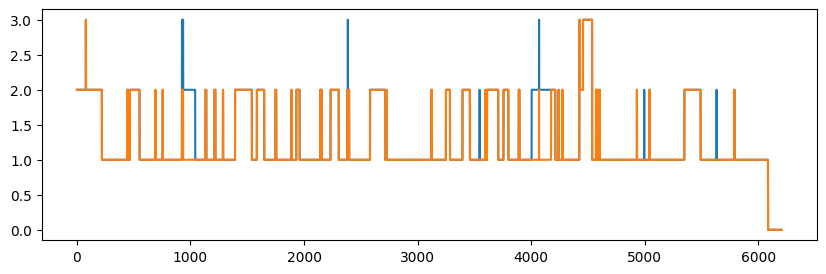

In [29]:
allele = 'major_cn'

plt.figure(figsize=(10, 3))
plt.plot(np.arange(len(df_A[allele])), df_A[allele])
plt.plot(np.arange(len(df_B[allele])), df_B[allele])
plt.show()

In [6]:
df[df['minor_cn'] == 0]

,clone_id,chr,start,end,copy,total_cn,minor_cn,major_cn
0,E,1,1,500000,NaN,4,0,4
1,E,1,500001,1000000,NaN,4,0,4
2,E,1,1000001,1500000,4.906717,4,0,4
3,E,1,1500001,2000000,3.793922,4,0,4
4,E,1,2000001,2500000,5.130191,4,0,4
...,...,...,...,...,...,...,...,...
55849,F,Y,57000001,57500000,NaN,0,0,0
55850,F,Y,57500001,58000000,NaN,0,0,0
55851,F,Y,58000001,58500000,NaN,0,0,0
55852,F,Y,58500001,59000000,NaN,0,0,0


In [7]:
df['minor_cn'].value_counts()

minor_cn
0    24063
1    17086
2    13998
3      403
4      157
5      147
Name: count, dtype: int64

In [8]:
df['major_cn'].value_counts()

major_cn
2     24104
1     19087
3      5640
4      3430
5      1586
0      1071
6       779
7       144
8         8
9         3
10        2
Name: count, dtype: int64

In [10]:
df['total_cn'].value_counts()

total_cn
2     21680
4     11870
1      7591
3      6504
5      4171
6      1813
0      1071
7       435
8       273
9       203
11      150
10       93
Name: count, dtype: int64

In [13]:
df[df['minor_cn'] == 0].value_counts(['clone_id'])

clone_id
A           2980
B           2881
E           2844
C           2725
D           2706
F           2703
I           2419
G           2403
H           2402
Name: count, dtype: int64

# Draw Copy Number Plots

In [1]:
import pandas as pd

In [3]:
df_cell_cn = pd.read_csv("../scratch/data/ov2295_cell_cn.csv.gz")
df_cell_cn

,cell_id,sample_id,library_id,chr,start,end,reads,copy,state
0,SA922-A90554B-R34-C70,SA922,A90554B,1,1,500000,13,NaN,6
1,SA922-A90554B-R34-C70,SA922,A90554B,1,500001,1000000,442,NaN,6
2,SA922-A90554B-R34-C70,SA922,A90554B,1,1000001,1500000,461,6.672340,6
3,SA922-A90554B-R34-C70,SA922,A90554B,1,1500001,2000000,478,5.211916,6
4,SA922-A90554B-R34-C70,SA922,A90554B,1,2000001,2500000,594,8.384862,6
...,...,...,...,...,...,...,...,...,...
12200991,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57000001,57500000,0,NaN,0
12200992,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57500001,58000000,0,NaN,0
12200993,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58000001,58500000,0,NaN,0
12200994,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58500001,59000000,81,NaN,0


In [4]:
df = df_cell_cn

df['chr'] = df['chr'].astype(str).str.replace('chr', '', regex=False)

chr_order = {str(i): i for i in range(1, 23)}
chr_order.update({'X': 23, 'Y': 24, 'MT': 25, 'M': 25})
df['chr_num'] = df['chr'].map(chr_order)

df['pos'] = df['chr_num'].astype(str).str.zfill(2) + ":" + df['start'].astype(int).astype(str).str.zfill(10)

df_cell_cn

,cell_id,sample_id,library_id,chr,start,end,reads,copy,state,chr_num,pos
0,SA922-A90554B-R34-C70,SA922,A90554B,1,1,500000,13,NaN,6,1,01:0000000001
1,SA922-A90554B-R34-C70,SA922,A90554B,1,500001,1000000,442,NaN,6,1,01:0000500001
2,SA922-A90554B-R34-C70,SA922,A90554B,1,1000001,1500000,461,6.672340,6,1,01:0001000001
3,SA922-A90554B-R34-C70,SA922,A90554B,1,1500001,2000000,478,5.211916,6,1,01:0001500001
4,SA922-A90554B-R34-C70,SA922,A90554B,1,2000001,2500000,594,8.384862,6,1,01:0002000001
...,...,...,...,...,...,...,...,...,...,...,...
12200991,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57000001,57500000,0,NaN,0,24,24:0057000001
12200992,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57500001,58000000,0,NaN,0,24,24:0057500001
12200993,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58000001,58500000,0,NaN,0,24,24:0058000001
12200994,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58500001,59000000,81,NaN,0,24,24:0058500001


In [5]:
d_df = df.pivot(
    index='cell_id',
    columns='pos',
    values='state'
)
d_mat = d_df.to_numpy()
d_mat

array([[ 2,  2,  2, ...,  0,  0,  0],
       [ 4,  4,  4, ...,  0,  0,  0],
       [ 2,  2,  2, ...,  0,  0,  0],
       ...,
       [ 5,  5,  5, ...,  0,  0,  0],
       [ 5,  5,  5, ...,  0,  0,  0],
       [11, 11, 11, ...,  0,  0,  0]], shape=(1966, 6206))

In [8]:
d_df

pos,01:0000000001,01:0000500001,01:0001000001,01:0001500001,01:0002000001,01:0002500001,01:0003000001,01:0003500001,01:0004000001,01:0004500001,...,24:0054500001,24:0055000001,24:0055500001,24:0056000001,24:0056500001,24:0057000001,24:0057500001,24:0058000001,24:0058500001,24:0059000001
cell_id,,,,,,,,,,,,,,,,,,,,,
SA1090-A96213A-R20-C06,2,2,2,2,2,2,4,2,2,2,...,0,0,0,0,0,0,0,0,0,0
SA1090-A96213A-R20-C08,4,4,4,4,4,4,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
SA1090-A96213A-R20-C09,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
SA1090-A96213A-R20-C10,8,8,8,8,8,8,8,8,8,8,...,0,0,0,0,0,0,0,0,0,0
SA1090-A96213A-R20-C11,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA922-A90554B-R35-C66,8,8,8,8,8,8,8,8,4,4,...,0,0,0,0,0,0,0,0,0,0
SA922-A90554B-R35-C67,6,6,6,6,6,6,6,6,4,4,...,0,0,0,0,0,0,0,0,0,0
SA922-A90554B-R35-C68,5,5,5,5,5,5,5,5,3,3,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

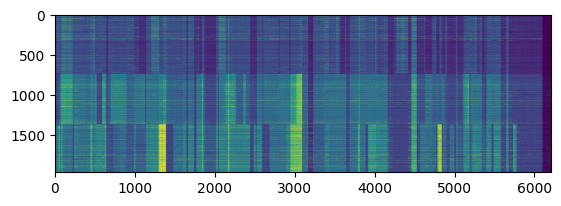

In [ ]:
plt.imshow(d_mat)
plt.show()

In [9]:
df_clone_cn = pd.read_csv("../data/laks/ov2295_clone_cn.csv.gz")
df_clone_cn

,clone_id,chr,start,end,copy,total_cn,minor_cn,major_cn
0,E,1,1,500000,NaN,4,0,4
1,E,1,500001,1000000,NaN,4,0,4
2,E,1,1000001,1500000,4.906717,4,0,4
3,E,1,1500001,2000000,3.793922,4,0,4
4,E,1,2000001,2500000,5.130191,4,0,4
...,...,...,...,...,...,...,...,...
55849,F,Y,57000001,57500000,NaN,0,0,0
55850,F,Y,57500001,58000000,NaN,0,0,0
55851,F,Y,58000001,58500000,NaN,0,0,0
55852,F,Y,58500001,59000000,NaN,0,0,0


In [27]:
df_A = df[df["clone_id"].isin(["A"])]
df_B = df[df["clone_id"].isin(["B"])]
df_ = pd.merge(df_A, df_B, on=["chr", "start", "end"], suffixes=("_A", "_B"), how="inner")
df_

,clone_id_A,chr,start,end,copy_A,total_cn_A,minor_cn_A,major_cn_A,clone_id_B,copy_B,total_cn_B,minor_cn_B,major_cn_B
0,A,1,1,500000,NaN,2,0,2,B,NaN,2,0,2
1,A,1,500001,1000000,NaN,2,0,2,B,NaN,2,0,2
2,A,1,1000001,1500000,2.695808,2,0,2,B,2.791536,2,0,2
3,A,1,1500001,2000000,2.202514,2,0,2,B,2.297071,2,0,2
4,A,1,2000001,2500000,2.752558,2,0,2,B,2.917039,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,A,Y,57000001,57500000,NaN,0,0,0,B,NaN,0,0,0
6202,A,Y,57500001,58000000,NaN,0,0,0,B,NaN,0,0,0
6203,A,Y,58000001,58500000,NaN,0,0,0,B,NaN,0,0,0
6204,A,Y,58500001,59000000,NaN,0,0,0,B,NaN,0,0,0


In [32]:
df_["total_cn_B"].value_counts()

total_cn_B
2    3745
1    1803
3     539
0     119
Name: count, dtype: int64

In [33]:
df_["total_cn_A"].value_counts()

total_cn_A
2    3651
1    1757
3     668
0     119
4      11
Name: count, dtype: int64

In [31]:
df_[(df_["total_cn_A"] != df_["total_cn_B"]) & (df_["total_cn_B"] == 0)]

,clone_id_A,chr,start,end,copy_A,total_cn_A,minor_cn_A,major_cn_A,clone_id_B,copy_B,total_cn_B,minor_cn_B,major_cn_B


In [25]:
for cluster_at_top in ("B", "A"):
    cluster_at_bottom = "A" if cluster_at_top == "B" else "B"
    print(f"Evidence for {cluster_at_top} -/-> {cluster_at_bottom}: number of locations where total_cn for cluster {cluster_at_top}=0 and cluster {cluster_at_bottom} > 0:", len(df_[(df_[f"total_cn_{cluster_at_top}"] == 0) & (df_[f"total_cn_{cluster_at_bottom}"] > 0)]))


Evidence for B -/-> A: number of locations where total_cn for cluster B=0 and cluster A > 0: 0
Evidence for A -/-> B: number of locations where total_cn for cluster A=0 and cluster B > 0: 0


In [21]:
for cluster_at_top in ("B", "A"):
    for allele in (1, 2):
        cluster_at_bottom = "A" if cluster_at_top == "B" else "B"
        print(f"Evidence for {cluster_at_top} -/-> {cluster_at_bottom}: number of locations where allele_{allele}_sum for cluster {cluster_at_top}=0 and cluster {cluster_at_bottom} > 0:", len(df_[(df_[f"allele_{allele}_sum_{cluster_at_top}"] == 0) & (df_[f"allele_{allele}_sum_{cluster_at_bottom}"] > 0)]))



Evidence for B -/-> A: number of locations where allele_1_sum for cluster B=0 and cluster A > 0: 1358
Evidence for B -/-> A: number of locations where allele_2_sum for cluster B=0 and cluster A > 0: 1362
Evidence for A -/-> B: number of locations where allele_1_sum for cluster A=0 and cluster B > 0: 1892
Evidence for A -/-> B: number of locations where allele_2_sum for cluster A=0 and cluster B > 0: 1959
